## 1. Dummy variable and interaction: 더미변수와 상호작용

In [1]:
import numpy as np     #넘피
import pandas as pd    #판다스
import matplotlib.pyplot as plt  #시각화
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  #선형회귀
from sklearn import metrics  #metrics가져오면 평가지표 가져올 수 있음
%matplotlib inline

### 1.1. Read in the data:

In [2]:
os.chdir(r'C:\Users\Gram\Desktop\myPyCode\04 머신러닝 - 실습\data')                  

In [3]:
df = pd.read_csv('data_studentlist.csv', header='infer',encoding='latin1')

In [4]:
#변수 heigt,weight,gender 3개 사용
df.head(5)   

#더미변수 1개 필요(유형 가짓수 -1 )

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


### 1.2. Linear regression without dummy variable: 더미변수가 없는 선형회귀
<br>
명목형 설명 변수가 없는 경우: weight ~ height (y~x)

In [5]:
lm = LinearRegression()    #함수실행해서 선형회귀 객체 만듬(함수에 아무것도 안 넣어서 결과안나옴)
X = df.height.values.reshape(-1,1) #시리즈에서 값을 뽑아 넘피배열을 reshape해서 행열 맞춰줌
Y = df.weight.values.reshape(-1,1)

lm.fit(X,Y)  #학습(in sample이라 안쪼갬)

b0 = lm.intercept_[0] #intercept가 넘피배열이라 원소값 가져옴
b1 = lm.coef_[0][0]   #coef라는 넘피배열에서 가져옴

rsq1 = lm.score(X,Y) #R^2 구하는 공식  
rmse1 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X))) #y랑 예측된y 넣어 계산

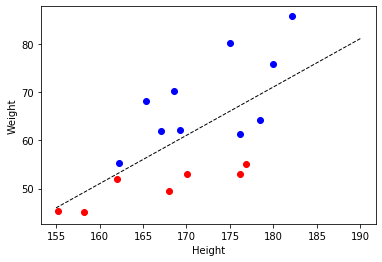

In [6]:
# 시각화 (회귀선을 성별로 구분할 필요 없음)
df_m = df[df.gender=='M']   # 색깔 따로 입혀 남성 여성 쪼갬 
df_f = df[df.gender=='F']   

x_grid = np.linspace(155,190,10)  #linsapce로 시작과 끝점 정하고, 10점으로 쪼갬

plt.scatter(x=df_m.height, y=df_m.weight, color='blue')  #가로는 남성신장,세로는 남성무게 파랗게 
plt.scatter(x=df_f.height, y=df_f.weight, color='red')

plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='black') #추세선 그리기
         #가로   #세로
plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()

### 1.3. Linear regression with dummy variable: 더미변수를 사용한 선형회귀
<br>
gender라는 명목형 변수가 있는 경우: weight ~ height + gender

In [7]:
#pandas의 get_dummies함수로 젠더시리즈가지고 더미변수 만듬
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')  

#drop_first=True: male,female 2개 칼럼 만들어짐 (유형개수-1개 만들기 위해)
#drop_first=False면 더미변수 한 개 더 많아짐

#prefix='gender'하면 Gender_M 생김
#gender로 이름을 시작해 명목형 변수의 값을 추가해 만든다라는 뜻

X = df[['height']].join(gender_dummy)  
Y = df[['weight']]

#Gender_M 생김

In [8]:
#회귀 수행
lm.fit(X,Y)  #학습

b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]

rsq2 = lm.score(X,Y) 
rmse2 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

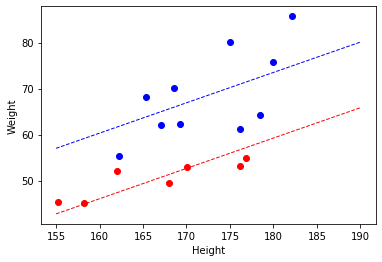

In [9]:
#시각화(성별로 회귀선 구별)
df_m = df[df.gender=='M']  
df_f = df[df.gender=='F']

x_grid = np.linspace(155,190,10)

plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')

plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + b1*x_grid, linestyle='--',linewidth=1,color='blue')

plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()

### 1.4. Linear regression with dummy variable that interacts: 상호 작용하는 더미 변수를 사용한 선형 회귀
<br>
gender라는 명목형 변수가 상호작용하는 경우: weight ~ height + gender + height $\times$ gender

In [11]:
#gender로 더미변수 만듬
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')
X = df[['height']].join(gender_dummy)
Y = df[['weight']]

In [12]:
# Create the interaction term. 
X['height x gender_M'] = X['height']*X['gender_M']
  #서로 교차한 것          #서로 곱함

#gender_M이 0이면 기여안함
#gender_M이 1인경우만 기여함

X.head(5)

,height,gender_M,height x gender_M
0,165.3,1,165.3
1,170.1,0,0.0
2,175.0,1,175.0
3,182.1,1,182.1
4,168.0,0,0.0


In [13]:
#회귀 수행
lm.fit(X,Y) #학습

b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
b3 = lm.coef_[0][2]

rsq3 = lm.score(X,Y)
rmse3 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

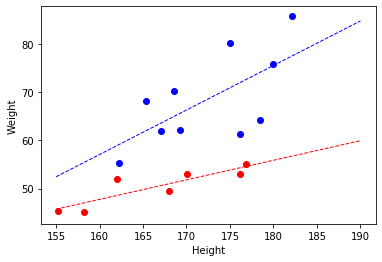

In [14]:
#시각화(성별로 회귀선 구별)
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']

x_grid = np.linspace(155,190,10)

plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')

plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red') #절편은 b0, 기울기는 b1
plt.plot(x_grid, (b0 + b2) + (b1+b3)*x_grid, linestyle='--',linewidth=1,color='blue') #절편은 (b0 + b2), 기울기(b1 + b3)

plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()

#절편말고 기울기 또한 바뀜

### 1.5. Compare  $R^2$, RMSE for the different cases: 결정계수 R^2와 rmse 비교

In [15]:
np.round([rsq1, rsq2, rsq3],3)                # R^2 (결정계수는 클수록 좋음)   

array([0.441, 0.762, 0.787])

In [16]:
np.round([rmse1, rmse2, rmse3],3)       #계속 숫자가 작아짐- 남녀구분짓지않고 rmse
                                        #더미변수와 상호작용한거는 더 작아짐

array([8.595, 5.613, 5.307])

결정계수 R^2은 커지고, rmse는 작아짐 = > 더 정교해지는 그래프다